In [566]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pywaffle import Waffle

In [567]:
link=r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
data=pd.read_excel(link,sheet_name = "Canada by Citizenship",skiprows=range(20),skipfooter=2)

In [568]:
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [570]:
data.rename(columns={
                        "OdName":"Country",
                        "AreaName":"Continent",
                        "RegName":"Region"
                     
                     },inplace=True)

In [571]:
data.set_index("Country", inplace=True)

In [572]:
df_canada=data[[x for x in data.columns if x not in ["Type","Coverage","AREA","REG","DEV"]]]

In [573]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217


In [574]:
import re
for country in data.index:
    if re.search(".*Re.*", country):
        print(country)

Central African Republic
China, Hong Kong Special Administrative Region
China, Macao Special Administrative Region
Czech Republic
Democratic People's Republic of Korea
Democratic Republic of the Congo
Dominican Republic
Iran (Islamic Republic of)
Lao People's Democratic Republic
Republic of Korea
Republic of Moldova
Syrian Arab Republic
The former Yugoslav Republic of Macedonia
United Republic of Tanzania
Venezuela (Bolivarian Republic of)


In [575]:
df_canada.select_dtypes(include=["float","object"])

,Continent,Region,DevName
Country,,,
Afghanistan,Asia,Southern Asia,Developing regions
Albania,Europe,Southern Europe,Developed regions
Algeria,Africa,Northern Africa,Developing regions
American Samoa,Oceania,Polynesia,Developing regions
Andorra,Europe,Southern Europe,Developed regions
...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions
Western Sahara,Africa,Northern Africa,Developing regions
Yemen,Asia,Western Asia,Developing regions


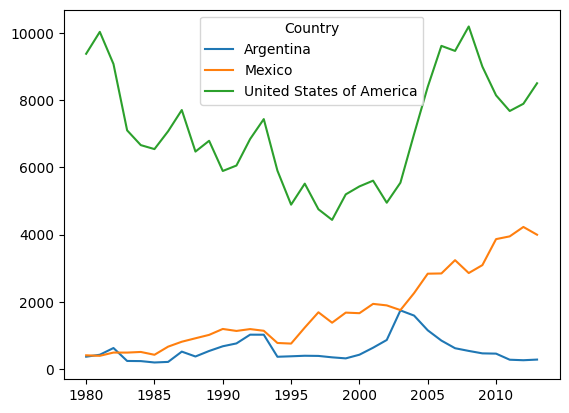

In [576]:
df_canada[df_canada.index.isin(["Mexico","United States of America","Argentina"])]._get_numeric_data().transpose().plot(kind="line")
plt.show()

In [577]:
df_canada["Total"]=df_canada._get_numeric_data().sum(axis=1).astype("int")

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_2040\1161881375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada["Total"]=df_canada._get_numeric_data().sum(axis=1).astype("int")


In [578]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


### Line Plots

In [579]:
plt.rcParams["figure.dpi"] = 2000
plt.figure(figsize=(10,8))
df_canada[df_canada.index.isin(["Haiti"])]._get_numeric_data().drop("Total",axis=1).transpose().plot(kind="line",color="orange",legend=False)
plt.title("Inmigration from Haiti")
plt.text(20,6000,"2010 Earthquake")
plt.plot(31,df_canada.loc["Haiti",2011],'o')
plt.xlabel("Years")
plt.ylabel("Number of inmigrants")
plt.show()

<Figure size 20000x16000 with 0 Axes>

### Area Plots

In [580]:
df_canada.sort_values("Total", ascending=False, inplace=True)
df_canada

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_2040\944492278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada.sort_values("Total", ascending=False, inplace=True)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


<Figure size 6000x4000 with 0 Axes>

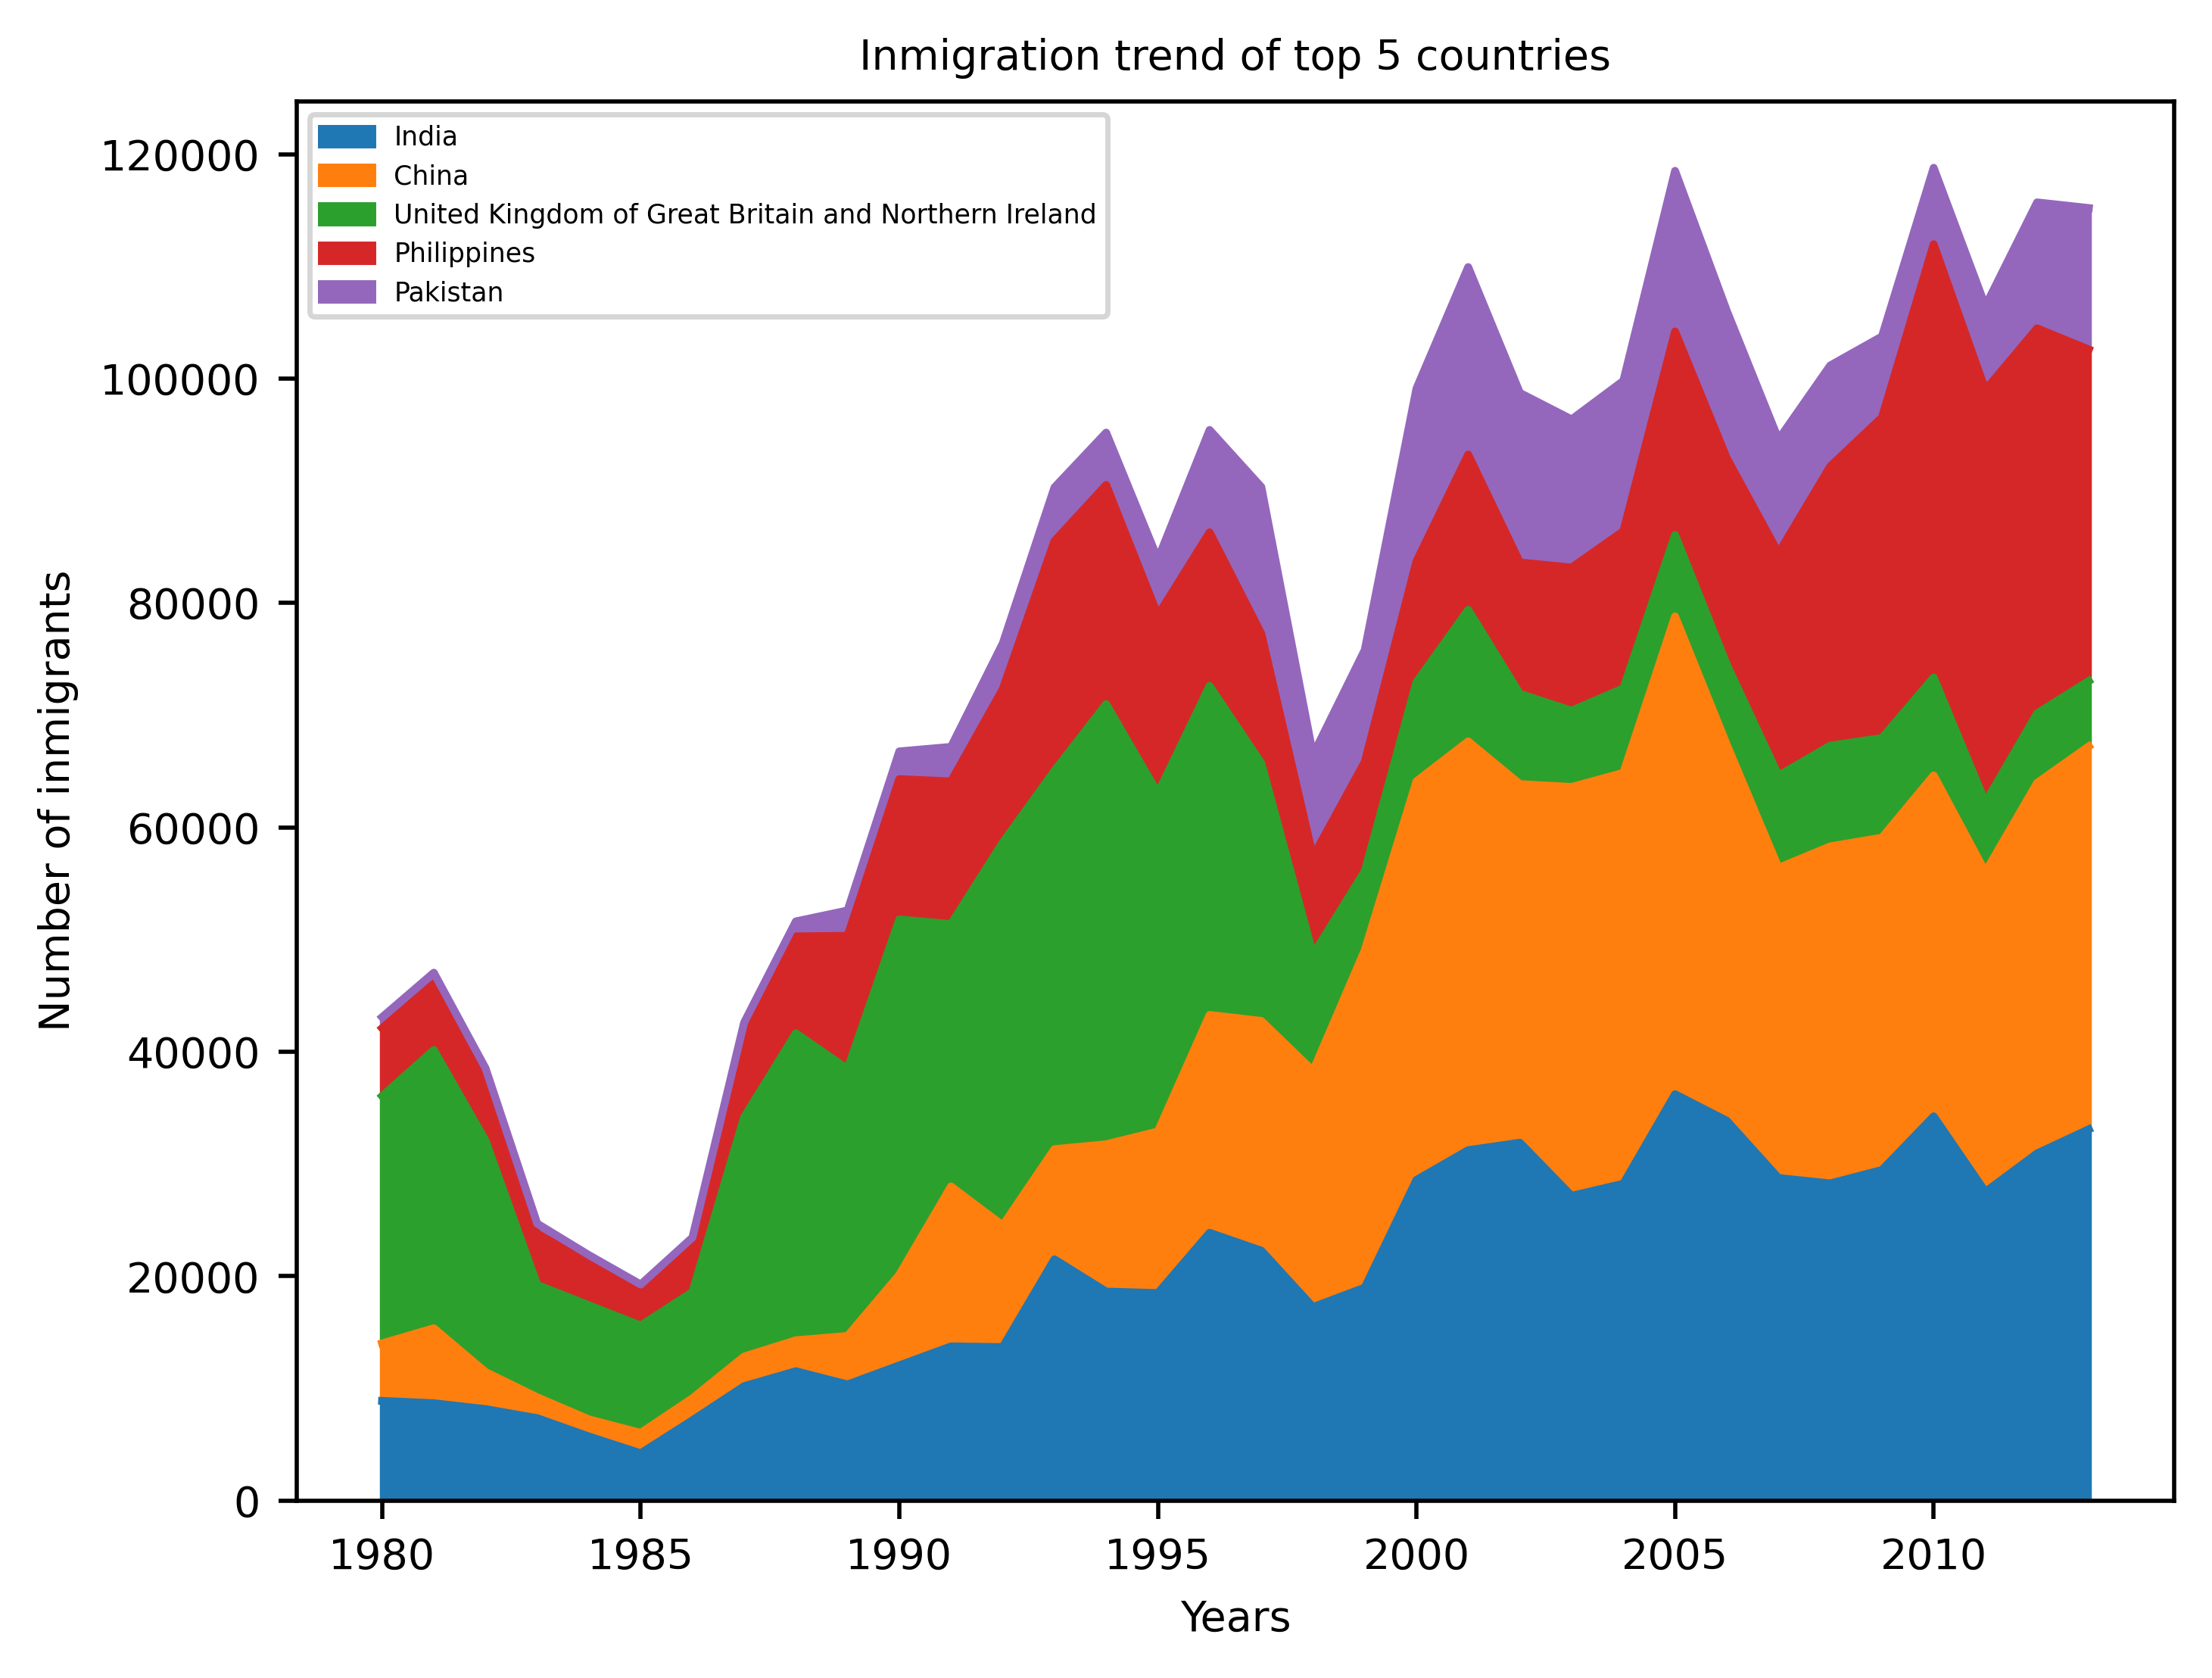

In [581]:
plt.rcParams["figure.dpi"]=500
plt.figure(figsize=(12,8))
df_canada._get_numeric_data().drop("Total", axis=1).head().transpose().plot(kind="area", fontsize=8)
plt.legend(fontsize=5)
plt.title("Inmigration trend of top 5 countries",fontsize=8)
plt.ylabel("Number of inmigrants", fontsize=8)
plt.xlabel("Years", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Histogram

In [582]:
count, bin_edges=np.histogram(df_canada[2013])
print(f"count of each bin: {count}, bin edges: {bin_edges}")

count of each bin: [178  11   1   2   0   0   0   0   1   2], bin edges: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


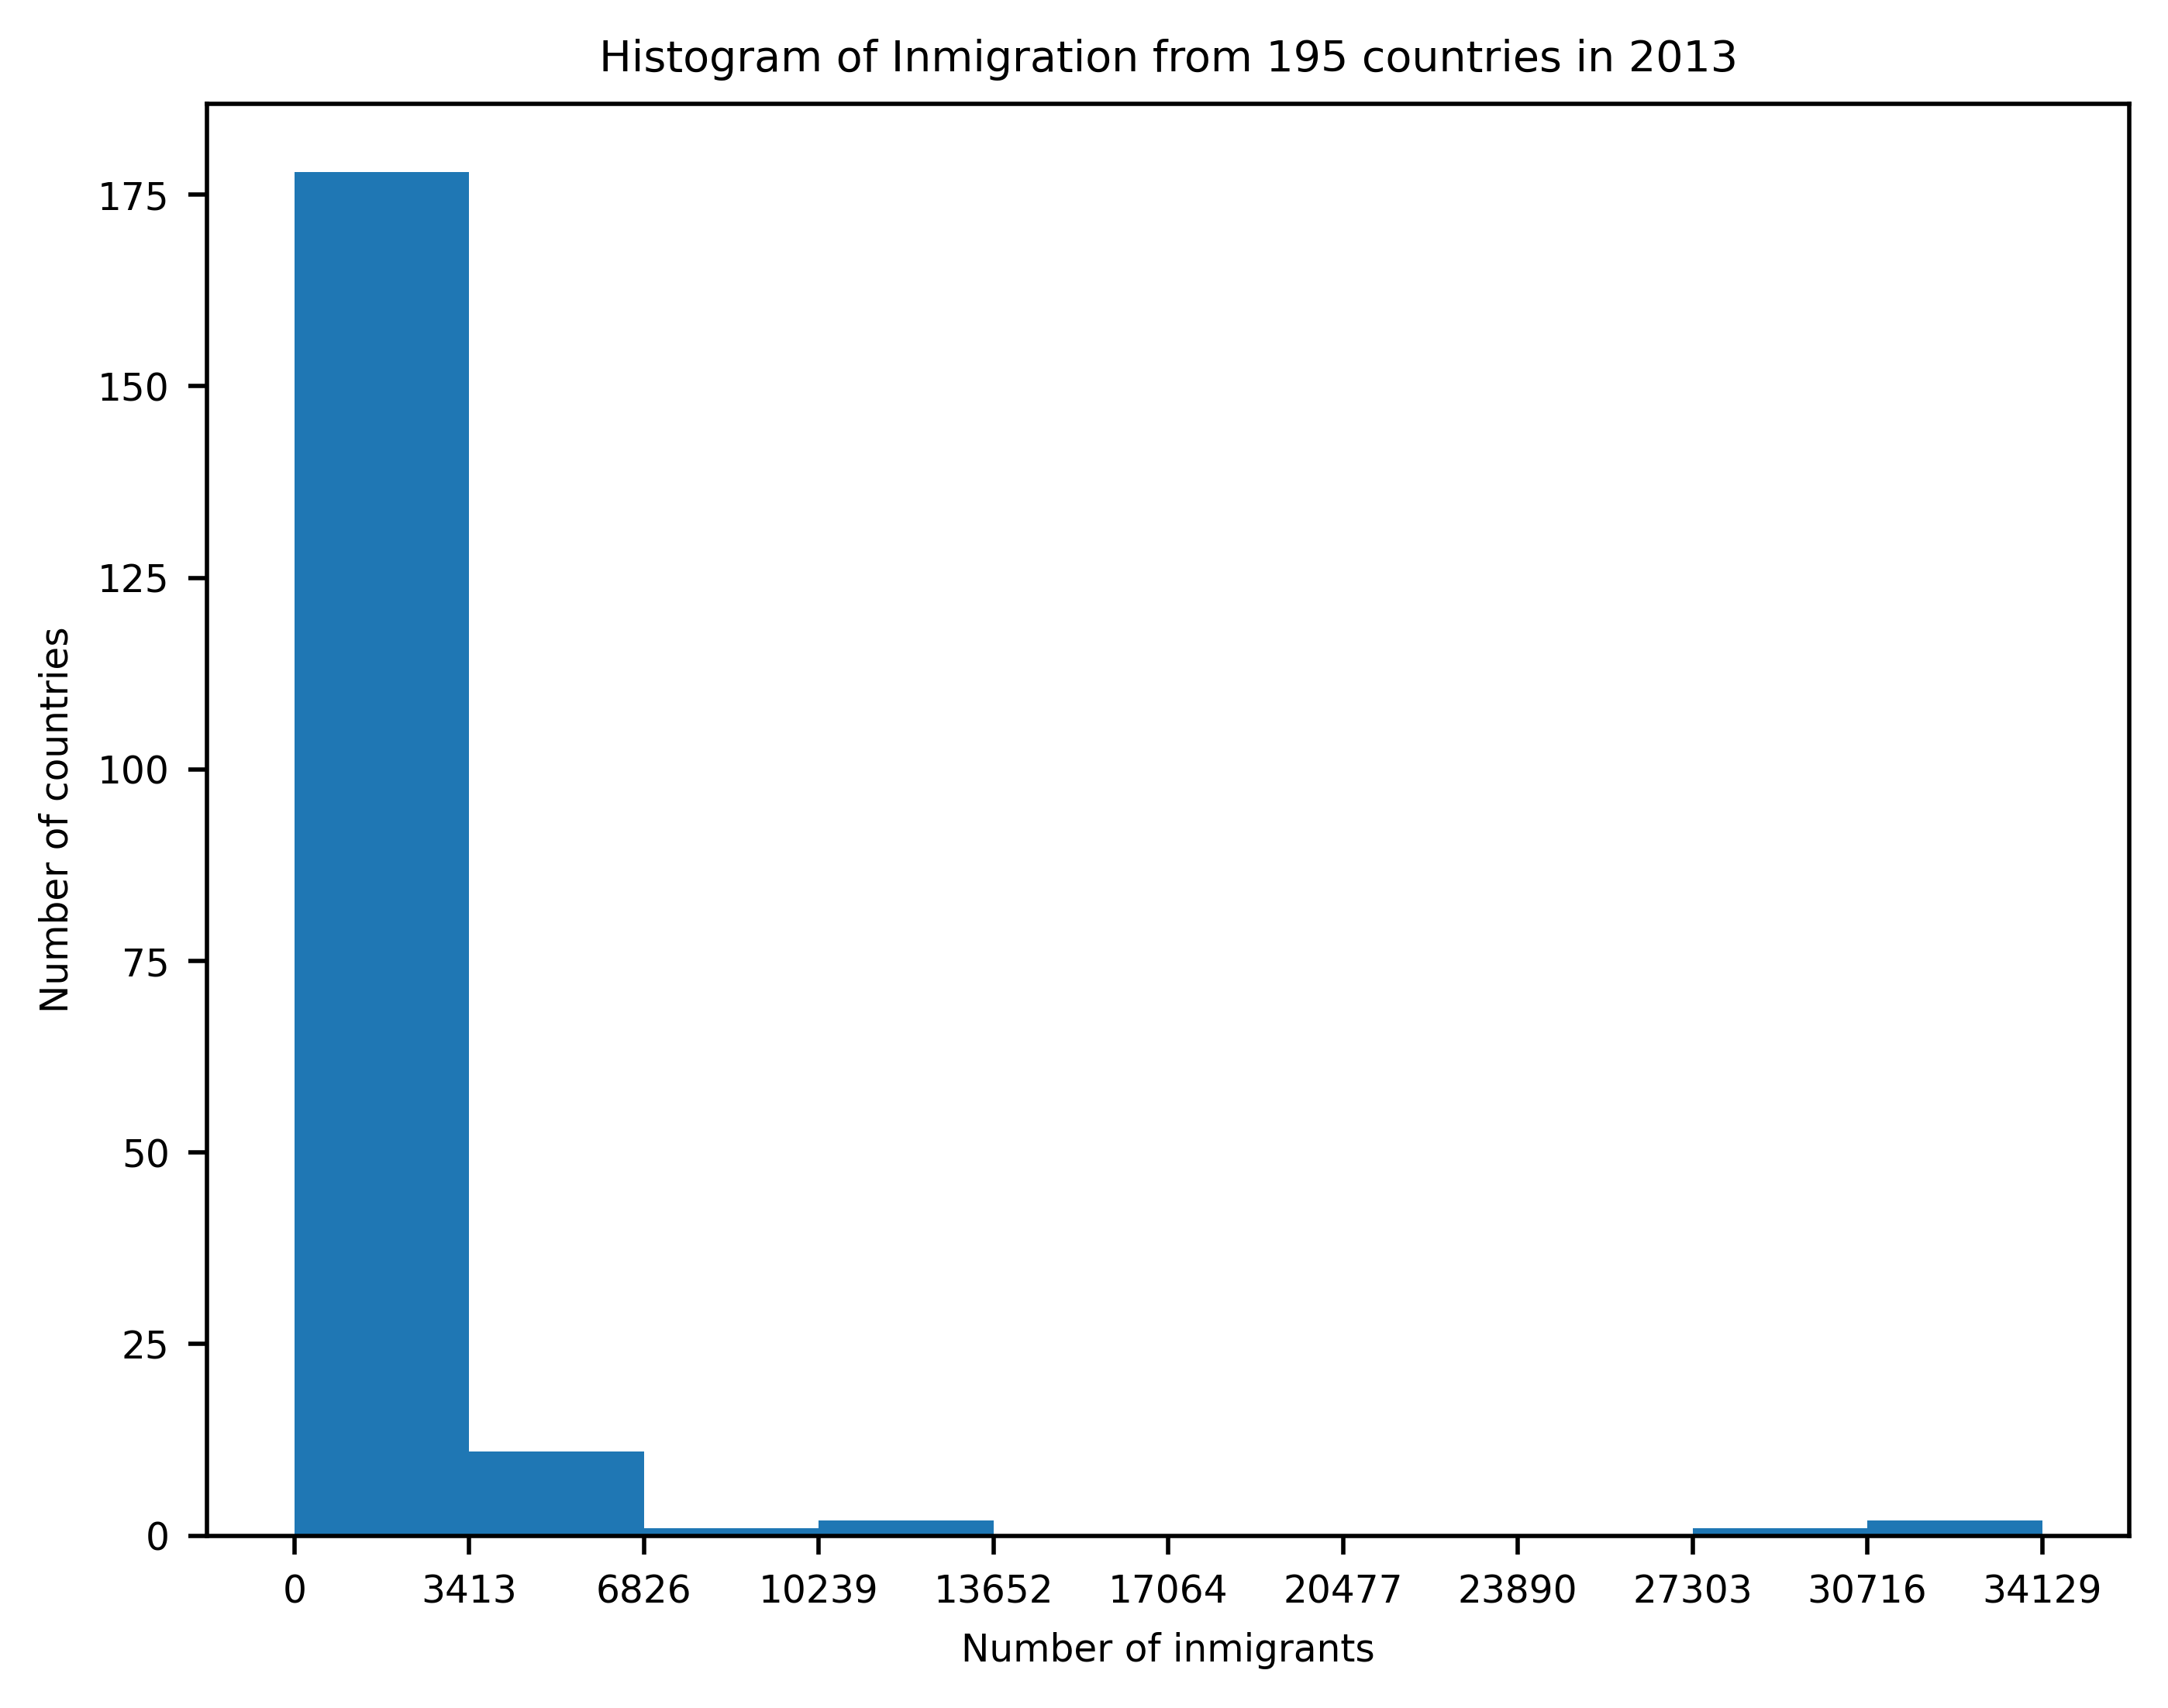

In [583]:
df_canada.drop("Total",axis=1)[2013].plot(kind='hist', xticks= bin_edges, fontsize=7)
plt.title("Histogram of Inmigration from 195 countries in 2013", fontsize=8)
plt.xlabel("Number of inmigrants", fontsize=7)
plt.ylabel("Number of countries",fontsize=7)
plt.show()

### Bar chart

<Figure size 5000x2500 with 0 Axes>

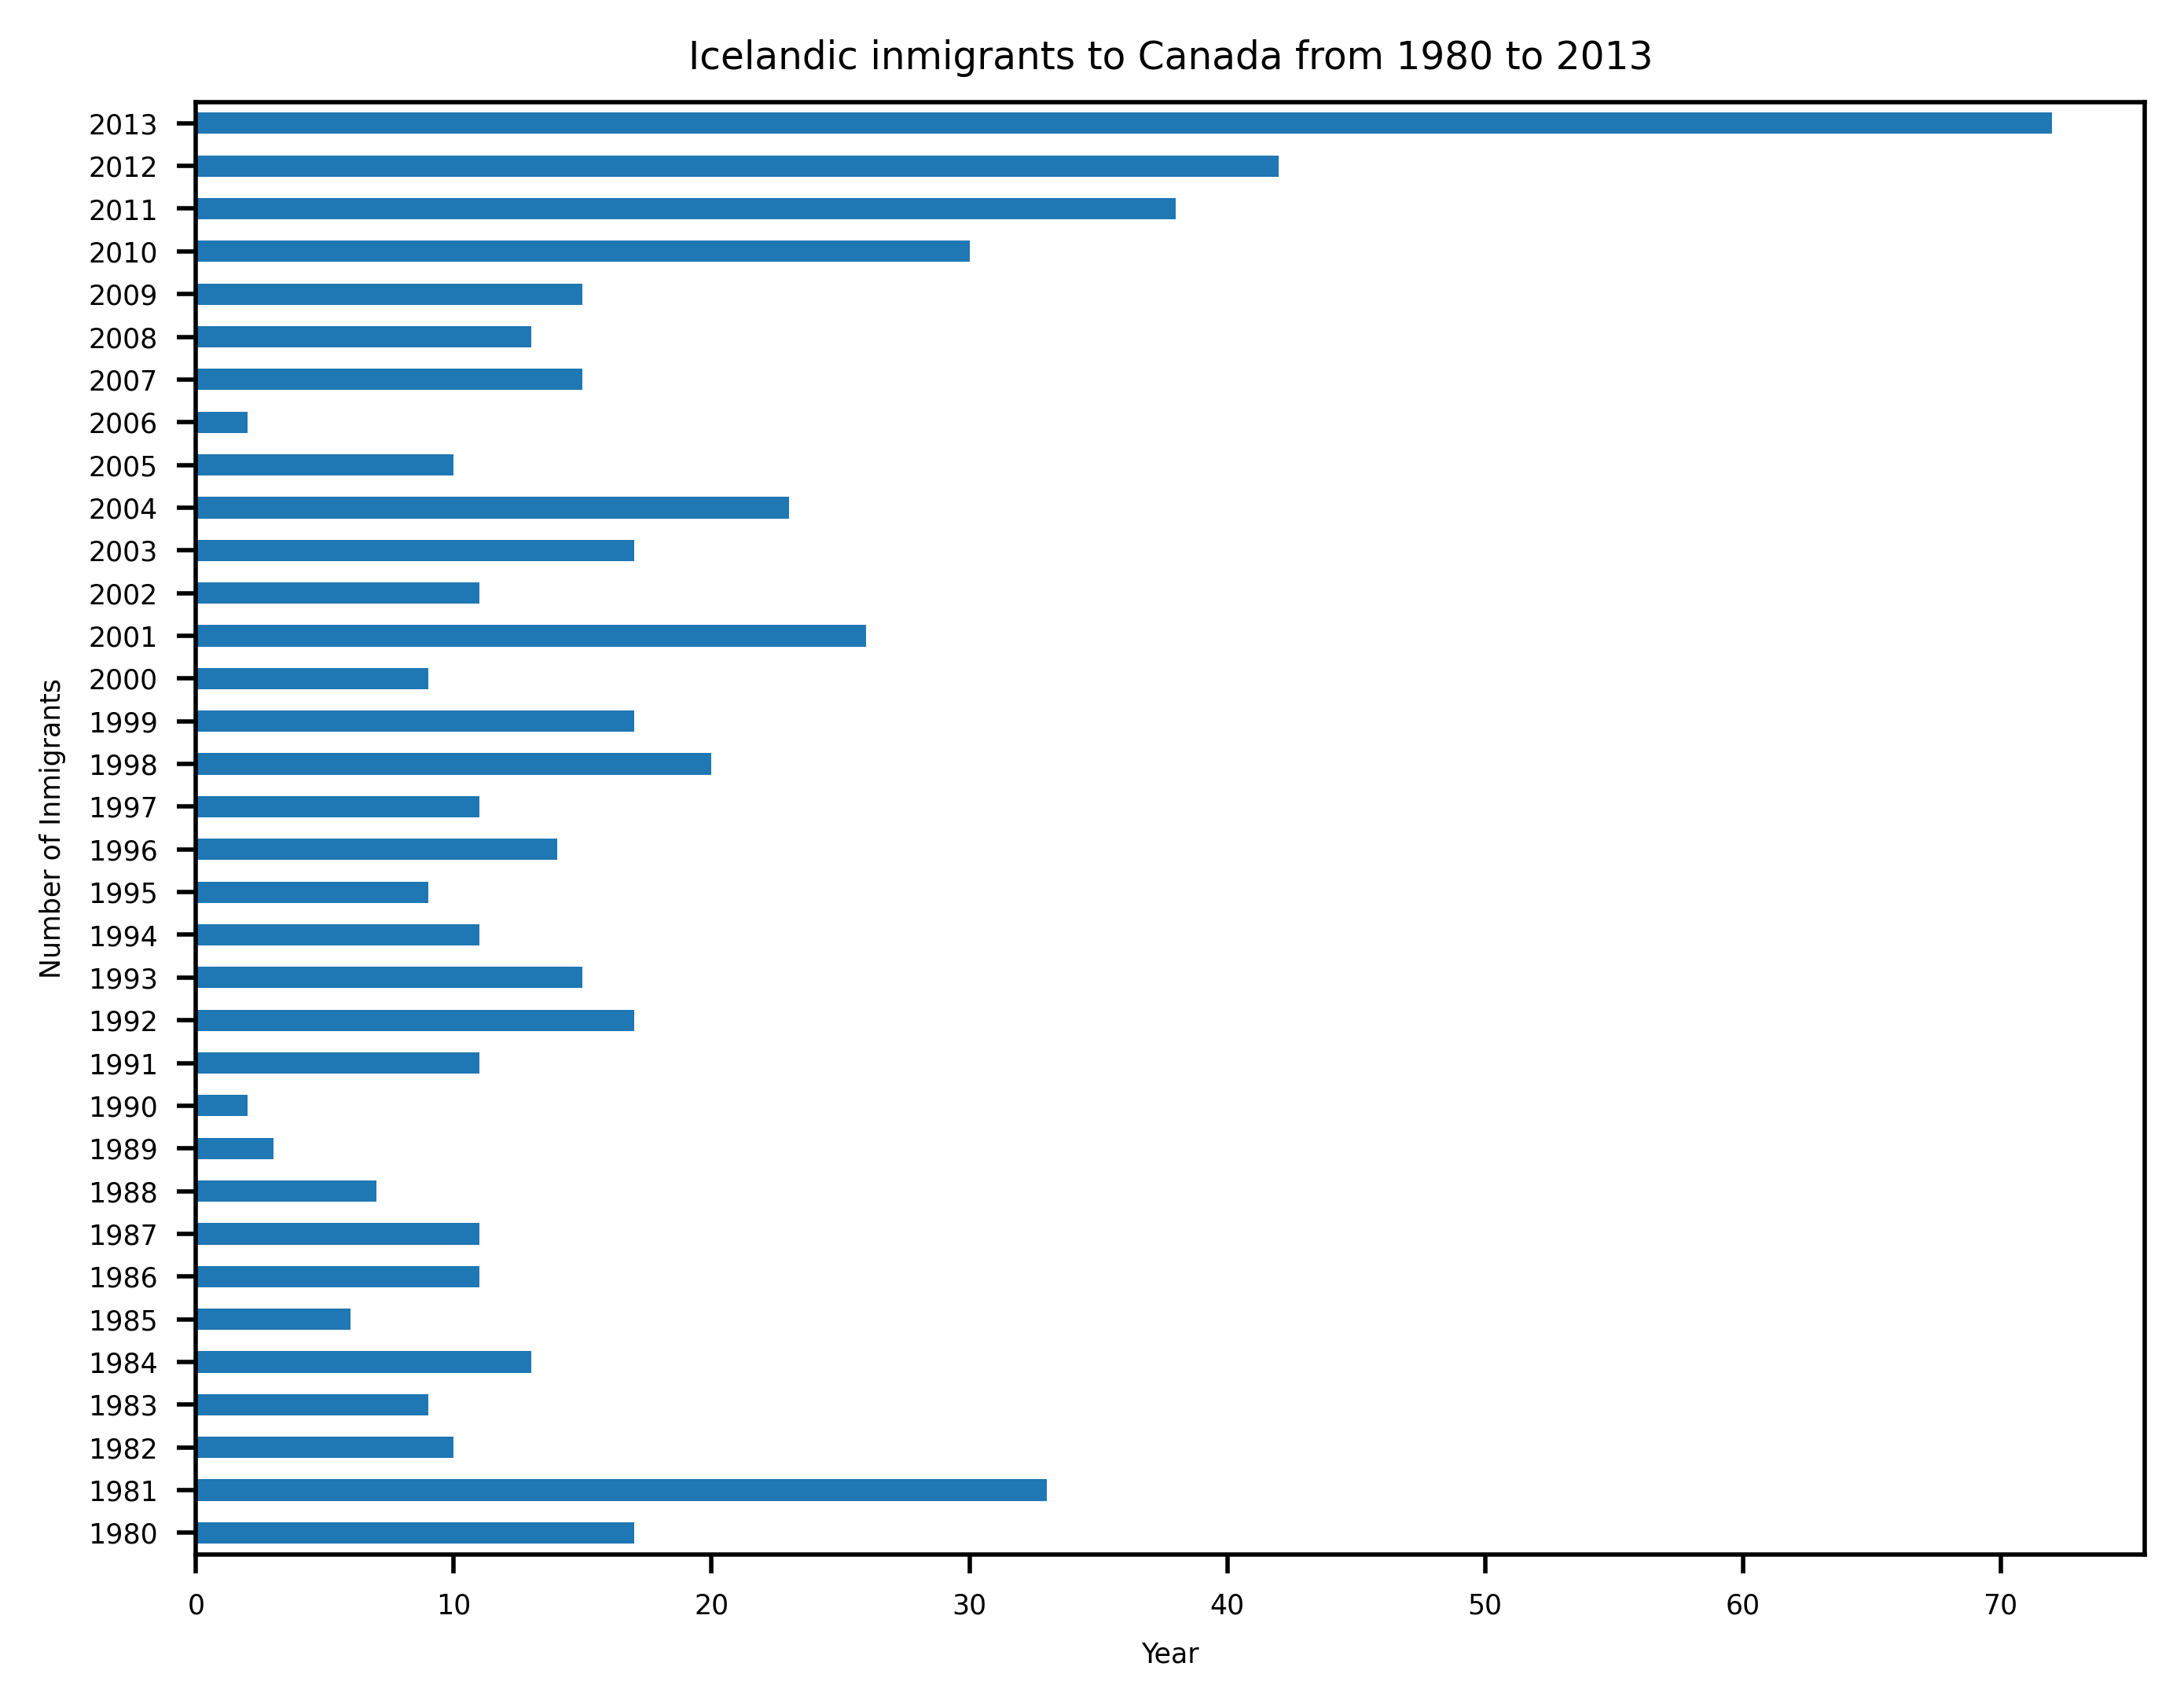

In [584]:
%matplotlib inline
plt.figure(figsize=(10,5))
df_canada[df_canada.index.isin(["Iceland"])].drop("Total",axis=1)._get_numeric_data().transpose().plot(kind="barh", fontsize=5, legend=False)
plt.title("Icelandic inmigrants to Canada from 1980 to 2013", fontsize=7)
plt.xlabel("Year", fontsize=5)
plt.ylabel("Number of Inmigrants",fontsize=5)
plt.show()

### Pie Charts

In [585]:
df_continents=df_canada.groupby("Continent").sum(numeric_only=True)
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


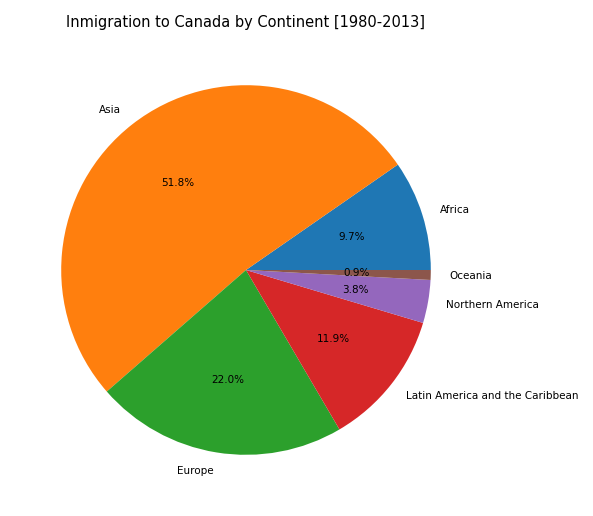

In [586]:
plt.rcParams["figure.dpi"]=150
plt.figure(figsize=(4,4))
df_continents.Total.plot(kind="pie", autopct = '%1.1f%%', fontsize=5)
plt.title("Inmigration to Canada by Continent [1980-2013]", fontsize=7)
plt.ylabel("")
plt.show()

### Boxplot

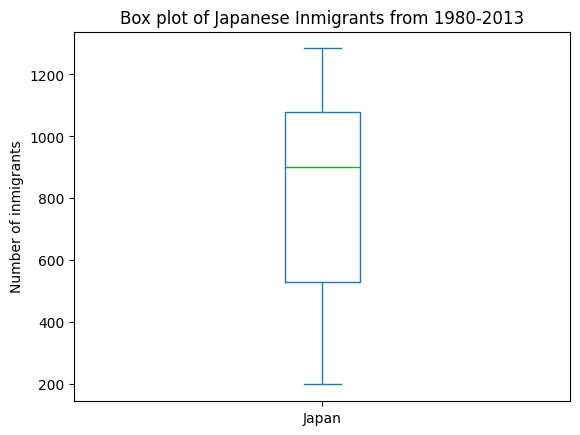

In [587]:
plt.rcParams["figure.dpi"]=100
df_japan=df_canada[df_canada.index == "Japan"].drop("Total", axis=1)._get_numeric_data().transpose()
df_japan.plot(kind="box")
plt.title("Box plot of Japanese Inmigrants from 1980-2013")
plt.ylabel("Number of inmigrants")
plt.show()

c:\Users\Emmanuel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


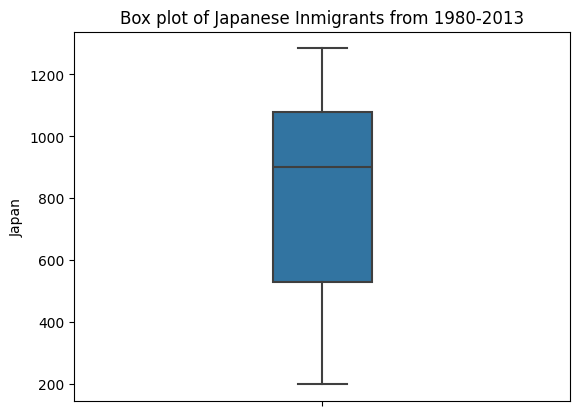

In [588]:
import seaborn as sns
plt.rcParams["figure.dpi"]=100
fig=sns.boxplot(data=df_japan, y = "Japan", width = 0.2)
fig.set_title("Box plot of Japanese Inmigrants from 1980-2013")
plt.show()

### Scatter Plot

In [589]:
df_totals=pd.DataFrame(df_canada._get_numeric_data().drop("Total",axis=1).sum(axis=0))
df_totals.index=map(int,df_totals.index)
df_totals.reset_index(inplace=True)
df_totals.columns=["Year","Totals"]
df_totals

,Year,Totals
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


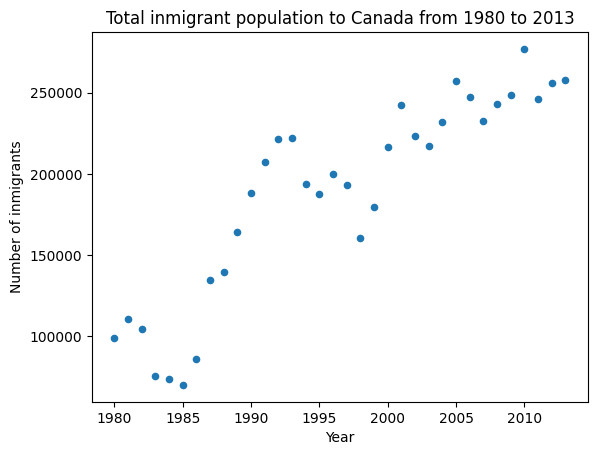

In [590]:
total_years=pd.DataFrame(df_canada._get_numeric_data().transpose().drop("Total",axis=0).sum(axis=1)).reset_index(drop=False).rename(columns={
                                                                                                                    0:"Totals",
                                                                                                                    "index":"Year"
                                                                                                                    })
total_years.plot(kind="scatter", x="Year", y="Totals")
plt.title("Total inmigrant population to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of inmigrants")
plt.show()

### Bubble Plot

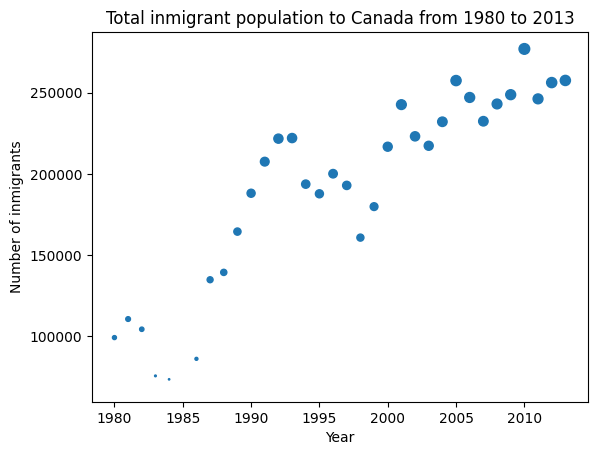

In [591]:
plt.rcParams["figure.dpi"]=100
total_years.plot(kind="scatter", x="Year", y="Totals", s = 20*total_years.Totals/total_years.Totals.min()-20)
plt.title("Total inmigrant population to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of inmigrants")
plt.show()

### Waffle Charts - Using Pywaffle library

In [592]:
df_dns=pd.DataFrame(df_canada.value_counts("Continent"))
df_dns.info()
df_dns.rename(columns={"count":"Total"},inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Africa to Northern America
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes


In [593]:
df_dns.index.name=None
df_dns=df_dns.loc[["Africa","Asia","Europe","Oceania"],:]
df_dns

,Total
Africa,54
Asia,49
Europe,43
Oceania,14


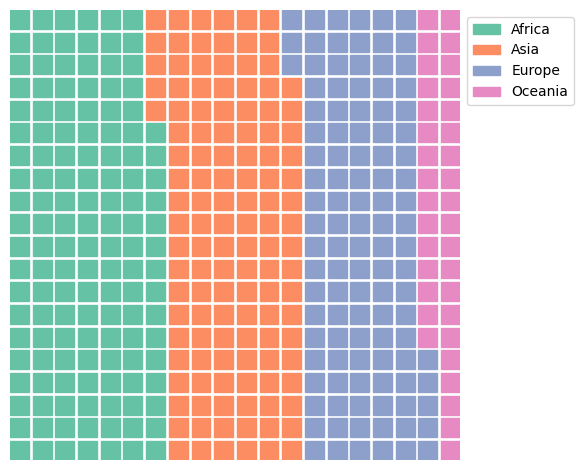

In [594]:
fig = plt.figure(
    
    FigureClass = Waffle,
    rows = 20,
    columns = 20,
    values = df_dns["Total"],
    legend = {

            'labels': ["Africa","Asia","Europe","Oceania"],
            'loc': 'upper left', 'bbox_to_anchor':(1,1)
    }
)
plt.show()

### Word Cloud Charts

In [595]:
from wordcloud import WordCloud, STOPWORDS
import urllib

In [596]:
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

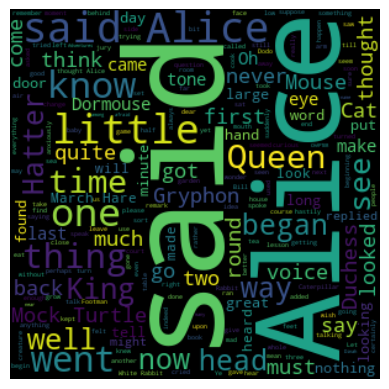

In [597]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300).generate(alice_novel)

# Remove the axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

plt.show() 


### Geospatial Data - Using Folium Library

In [598]:
import folium

In [599]:
world_map = folium.Map()
world_map

In [600]:
Canada = folium.Map ( 
                     
                     location = [56.130,-106.35],
                     zoom_start = 4
                    
                     )
Canada

In [601]:
Canada = folium.Map ( 
                     
                     location = [56.130,-106.35],
                     zoom_start = 4,
                     tiles="Stamen Terrain"
                    
                     )
Canada

Add markers to a plot

In [602]:
folium.Marker(
    
                location = [51.2538,-85.3232],
                popup = "Ontario"
).add_to(Canada)

Canada

In [603]:
world_map = folium.Map(
    zoom_start = 10
    
)
world_map

In [604]:
df_canada["Country"] = df_canada.index
df_canada

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_2040\2231551059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada["Country"] = df_canada.index


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Country
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,33848,28742,28261,29456,34235,27509,30933,33087,691904,India
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,33518,27642,30037,29622,30391,28502,33024,34129,659962,China
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7140,8216,8979,8876,8724,6204,6195,5827,551500,United Kingdom of Great Britain and Northern I...
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18400,19837,24887,28573,38617,36765,34315,29544,511391,Philippines
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,13127,10124,8994,7217,6811,7468,11227,12603,241600,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,5,San Marino
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,5,New Caledonia
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,Marshall Islands


In [605]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
folium.Choropleth(
    geo_data = world_geo,
    data = df_canada,
    columns = ["Country", "Total"],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    #legend_name = "Inmigration to Canada",
    
).add_to(world_map)

world_map